In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('cleaned_data.csv')

/tmp/ipykernel_38266/3410729341.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_data.csv')


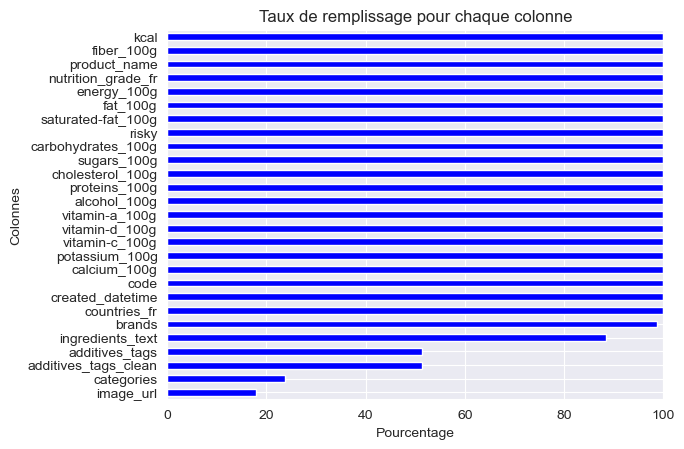

In [3]:
#taux de remplissage des variables
missing_values = 100*(data.notnull().mean())
missing_values = missing_values.sort_values(ascending=True)
missing_values.plot(kind='barh',title='Taux de remplissage pour chaque colonne', color='blue', xlim=[0,100])
plt.xlabel('Pourcentage')
plt.ylabel('Colonnes')
plt.show()

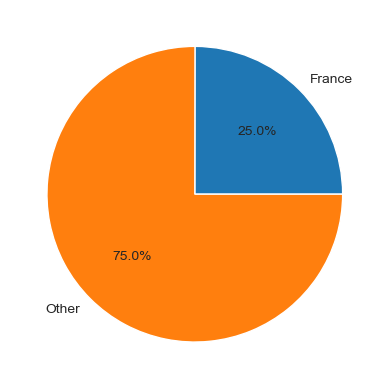

In [4]:
#répartition produits français
france_data = data[data['countries_fr'].str.contains('France', na=False)]
other_data = data[~data['countries_fr'].str.contains('France', na=False)]
france_percentage = len(france_data) / len(data) * 100
other_percentage = len(other_data) / len(data) * 100
plt.pie([france_percentage, other_percentage], labels=['France', 'Other'], autopct='%1.1f%%')
plt.show()

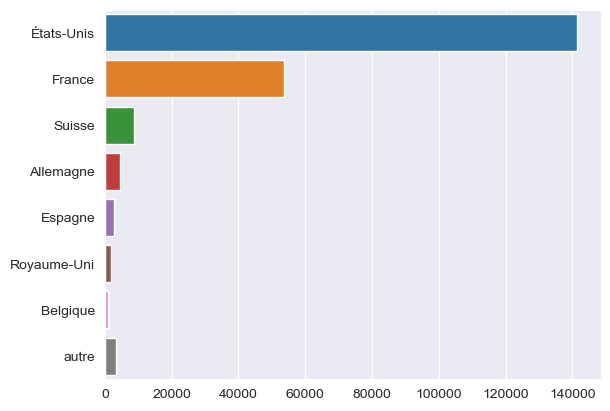

In [5]:
#répartition des produits par pays
pays = [
    "Afrique du Sud","Albanie","Algérie","Allemagne","Andorre","Angola","Arabie saoudite","Argentine","Arménie","Australie","Autriche","Azerbaïdjan",
    "Bahreïn","Bangladesh","Belgique","Belize","Bénin","Bhoutan","Biélorussie","Bolivie","Bosnie-Herzégovine","Botswana","Brésil","Brunei","Bulgarie","Burkina Faso","Burundi",
    "Cambodge","Cameroun","Canada","Cap-Vert","Chili","Chine","Chypre","Colombie","Comores","Congo","Corée du Nord","Corée du Sud","Costa Rica","Côte d'Ivoire","Croatie","Cuba",
    "Danemark","Djibouti","Dominique",
    "Égypte","Émirats arabes unis","Équateur","Érythrée","Espagne","Estonie","États-Unis","Éthiopie",
    "Fidji","Finlande","France",
    "Gabon","Gambie","Géorgie","Ghana","Grèce","Grenade","Guatemala","Guinée","Guinée-Bissau","Guinée équatoriale","Guyana",
    "Haïti","Honduras","Hong Kong","Hongrie",
    "Îles Marshall","Inde","Indonésie","Irak","Iran","Irlande","Islande","Israël","Italie",
    "Jamaïque","Japon","Jordanie",
    "Kazakhstan","Kenya","Kirghizistan","Kiribati","Koweït",
    "Laos","Lesotho","Lettonie","Liban","Liberia","Libye","Liechten","Liban","Lituanie","Luxembourg",
    "Malaisie","Malawi", "Mali", "Malte", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Monaco","Mongolie", "Monténégro",
    "Nigeria", "Norvège", "Nouvelle-Calédonie", "Nouvelle-Zélande",
    "Oman",
    "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal",
    "Qatar",
    "Roumanie", "Royaume-Uni", "République centrafricaine", "République dominicaine", "République tchèque",
    "Salvador", "Serbie", "Singapour", "Slovaquie", "Slovénie", "Suède",    "Suisse",
    "Taiwan", "Tanzanie", "Thaïlande", "Togo", "Tunisie", "Turquie",
    "Ukraine",
    "Venezuela", "Viêt Nam",
    "Yémen",
    "Zambie", "Zimbabwe"
]

data['countries_split'] = data['countries_fr'].str.split(',')
countries_series = data['countries_split'].explode().value_counts()
filtered_series = countries_series[countries_series.index.isin(pays)]

seuil = 1000
pays = filtered_series.loc[filtered_series >= seuil]
autre = pd.Series([filtered_series.loc[filtered_series < seuil].sum()], index=['autre'])
reordered_series =  pd.concat([pays, autre])

sns.barplot(x=reordered_series.values, y=reordered_series.index)
plt.show()

Le nombre de lignes data avant action est 214371


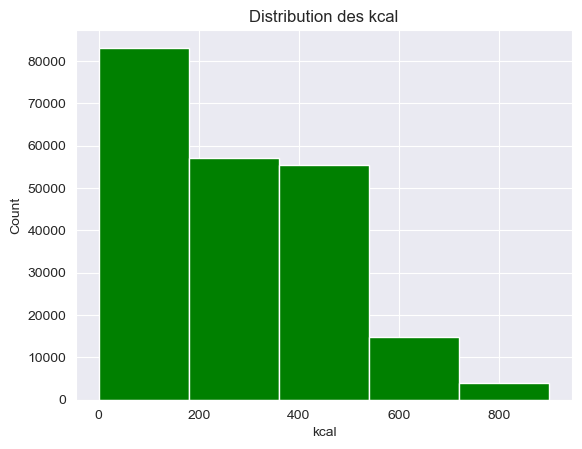

In [6]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

# (Distribution du nombre de produits par tranche d'énergie)
bins = 5

# # Plot the histogram
data['kcal'].hist(bins=bins, rwidth=1, color='g')

# # Add axis labels and plot title
plt.xlabel("kcal")
plt.ylabel("Count")
plt.title("Distribution des kcal")
plt.show()

Médiane des calories 267.66
Mode des calories 0    400.0
Name: kcal, dtype: float64
Moyenne des calories 273.1895502098959
Variance 37260.76733263409
Ecart type 193.03093313727635


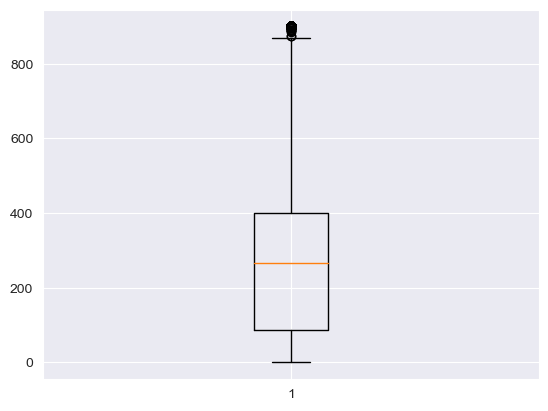

In [7]:
# Créer un diagramme en boîte à moustache pour les calories
plt.boxplot(data["kcal"])
print(f'Médiane des calories {data["kcal"].median()}')
print(f'Mode des calories {data["kcal"].mode()}')
print(f'Moyenne des calories {data["kcal"].mean()}')
print(f'Variance {data["kcal"].var(ddof=0)}')
print(f'Ecart type {data["kcal"].std()}')

# on constate que la médiane est proche de la moyenne ce qui témoigne d'une répartition assez équilibrée, et les outliers ne perturbent pas la moyenne

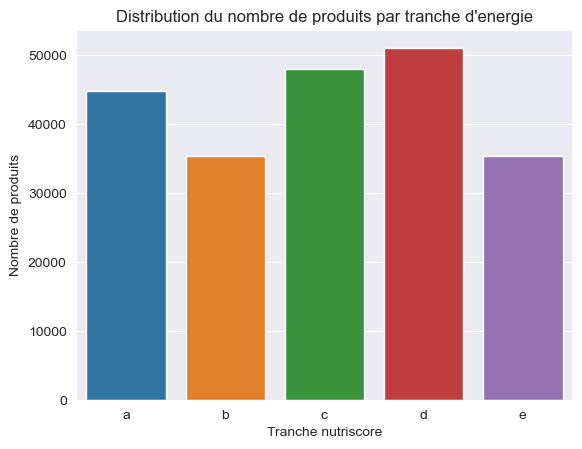

d    51033
c    47976
a    44744
b    35341
e    35277
Name: nutrition_grade_fr, dtype: int64
Mode nutri 0    d
Name: nutrition_grade_fr, dtype: object


In [8]:
order = ['a','b','c','d','e']
sns.countplot(x='nutrition_grade_fr', data=data, order=order)

# Set the plot's title and axis labels
plt.title("Distribution du nombre de produits par tranche d'energie")
plt.xlabel("Tranche nutriscore")
plt.ylabel("Nombre de produits")
# Display the plot
plt.show()
# Print the counts of each value
print(data['nutrition_grade_fr'].value_counts())
print(f'Mode nutri {data["nutrition_grade_fr"].mode()}')

# l'imputation par le calcul du nutriscore joue en faveur de la note A, mais il faut garder en tête que les valeurs manquantes
# à 35% pour les sucres et les graisses saturées peuvent expliquer cela

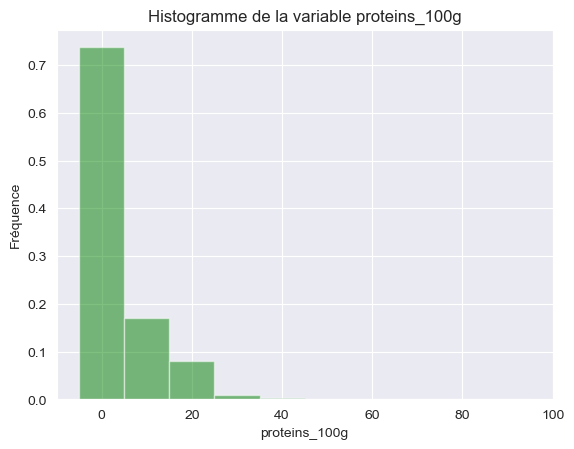

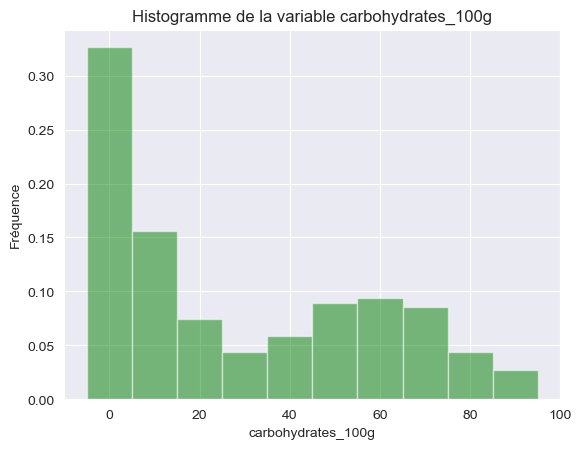

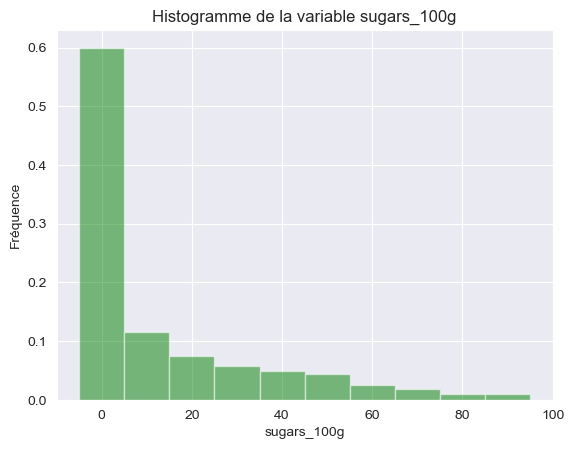

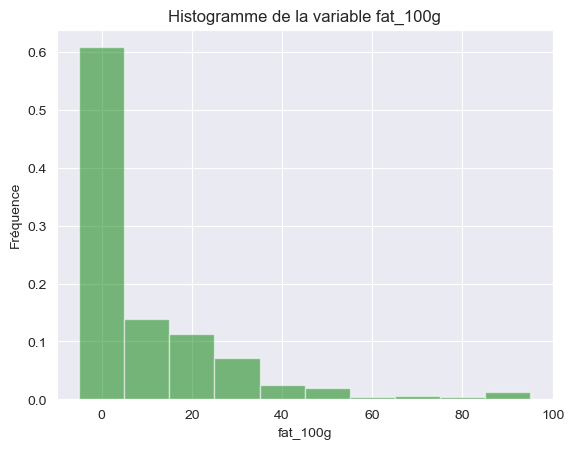

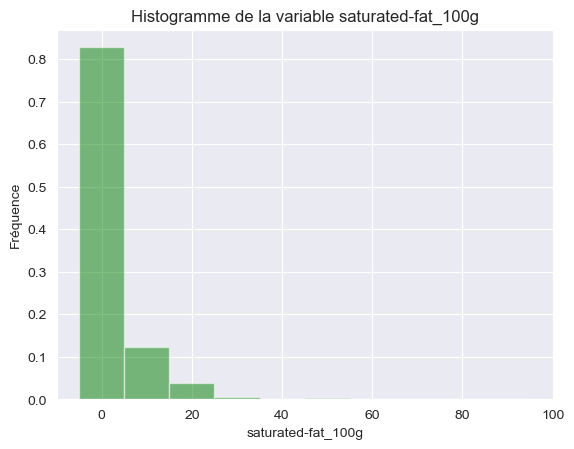

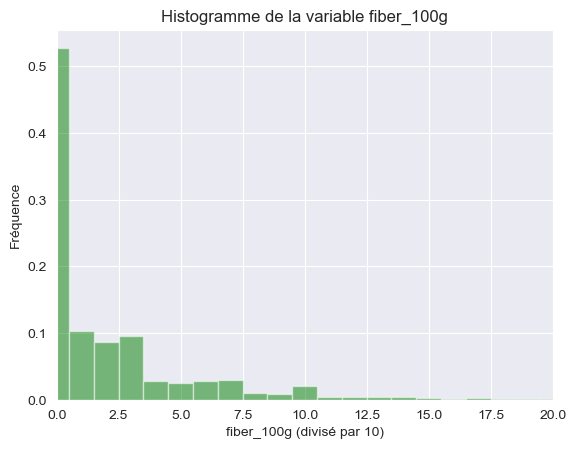

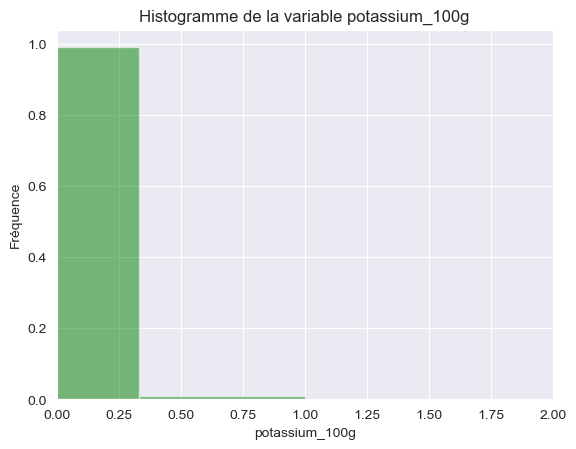

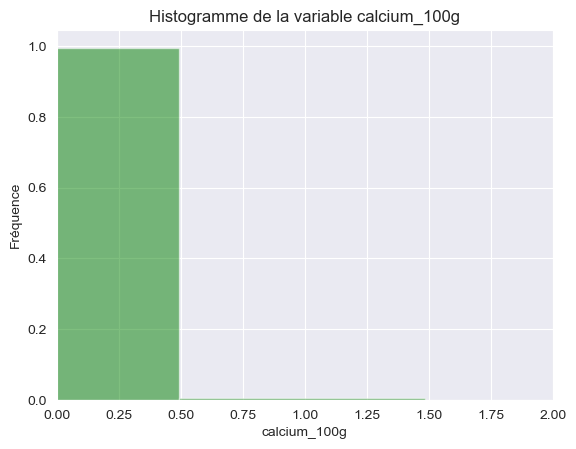

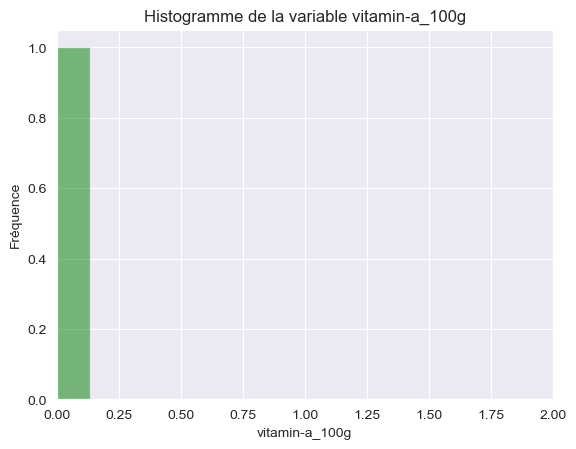

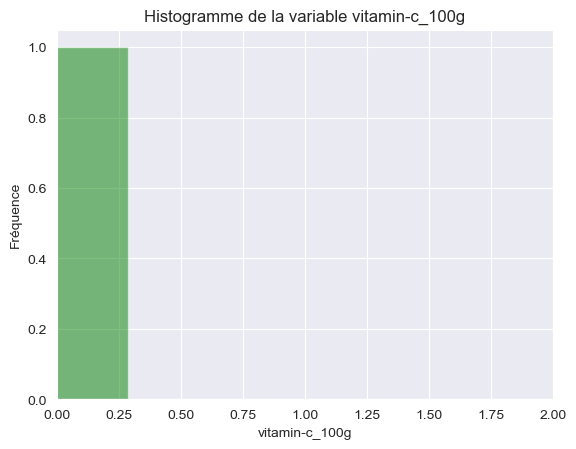

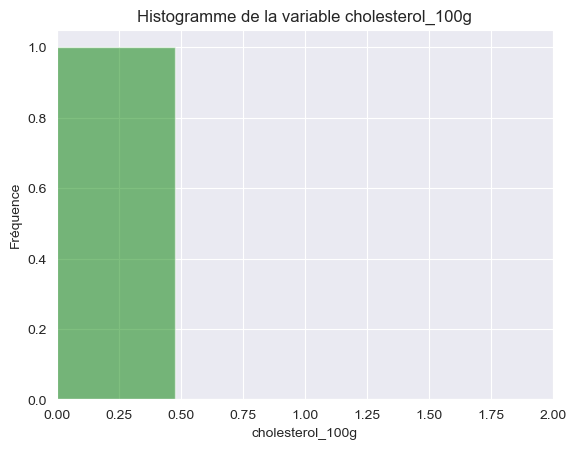

In [9]:
# Création des tranches pour l'histogramme
#Liste de variables quantitatives
quant_vars = ['proteins_100g', 'carbohydrates_100g', 'sugars_100g','fat_100g', 'saturated-fat_100g']

# Boucle à travers les variables quantitatives
for var in quant_vars:
    # Calcule les effectifs, les fréquences, les fréquences cumulées
    counts, bin_edges = np.histogram(data[var], bins = 10, density = False)
    freqs = counts / len(data[var])
    cdf = np.cumsum(freqs)

    # Tracer l'histogramme
    plt.bar(bin_edges[:-1], freqs, width = bin_edges[1] - bin_edges[0], color = 'g', alpha = 0.5)
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.title("Histogramme de la variable "+ var)
    plt.show()

quant_vars = ['fiber_100g']
for var in quant_vars:
    # Calcule les effectifs, les fréquences, les fréquences cumulées
    counts, bin_edges = np.histogram(data[var], bins = 100, density = False)
    freqs = counts / len(data[var])
    cdf = np.cumsum(freqs)

    # Tracer l'histogramme
    plt.bar(bin_edges[:-1], freqs, width = bin_edges[1] - bin_edges[0], color = 'g', alpha = 0.5)
    plt.xlabel(var + ' (divisé par 10)')
    plt.ylabel("Fréquence")
    plt.title("Histogramme de la variable "+ var)
    plt.xlim(0, 20)
    plt.show()

quant_vars = ['potassium_100g','calcium_100g','vitamin-a_100g','vitamin-c_100g','cholesterol_100g']
for var in quant_vars:
    # Calcule les effectifs, les fréquences, les fréquences cumulées
    counts, bin_edges = np.histogram(data[var], bins = 100, density = False)
    freqs = counts / len(data[var])
    cdf = np.cumsum(freqs)

    # Tracer l'histogramme
    plt.bar(bin_edges[:-1], freqs, width = bin_edges[1] - bin_edges[0], color = 'g', alpha = 0.5)
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.title("Histogramme de la variable "+ var)
    plt.xlim(0, 2)
    plt.show()

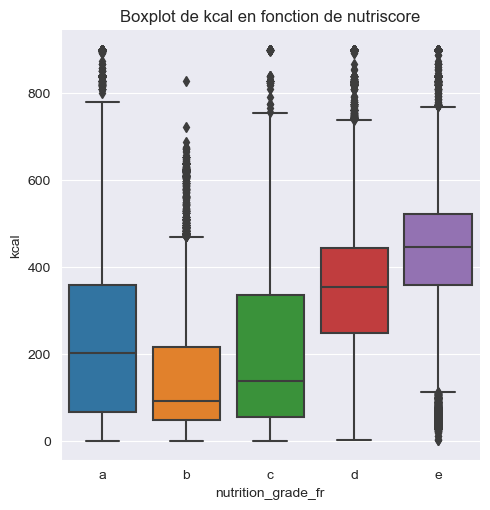

In [10]:
#  une hypothèse pourrait être que plus les calories d'un produit alimentaire sont élevées, plus il y a de chances que son nutriscore soit faible. Cela s'appuie sur l'idée que les produits alimentaires riches en calories ont tendance à être plus riches en matières grasses, sucres etc  ..
# Utiliser la fonction boxplot de seaborn pour créer un boxplot pour chaque niveau de nutriscore
sns.catplot(x="nutrition_grade_fr", y="kcal", data=data, kind="box", order=["a", "b", "c", "d", "e"])

plt.title("Boxplot de kcal en fonction de nutriscore")
plt.show()

#on rappelle que les meilleures notes sont probablement tirées vers le haut dû au valeurs manquantes à 35% des sucres et 35% des graisses saturées.
# partant de là, on peut observer une relation assez linéaire qui pourrait appuyer l'hypothèse. Des tests statistiques doivent être faits.
#on note aussi une plus forte dispersion autour de la médiane pour les notes A et C comparées aux autres

In [11]:
# Mapping des valeurs qualitatives ordinales

map_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5}
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5})

# calcul de la correlation
# coefficient de correlation = covar(x,y)/sx*sy
# covar(x,y) = 1/n * Σ((x_i - x̄) * (y_i - ȳ))

covar_x_y = data['kcal'].cov(data['nutrition_grade_fr'])
sx = data['kcal'].std()
sy = data['nutrition_grade_fr'].std()
ro_x_y = covar_x_y / sx * sy
ro_x_y


0.7650022502417806

<AxesSubplot:>

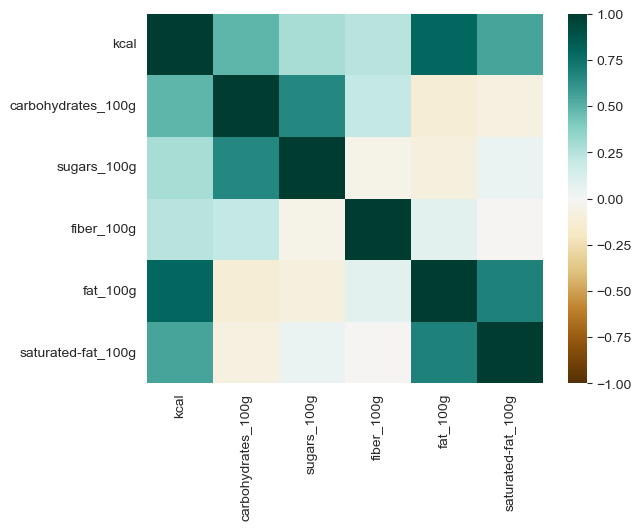

In [12]:
variables_quant = ['kcal','carbohydrates_100g', 'sugars_100g','fiber_100g','fat_100g', 'saturated-fat_100g']

sns.heatmap(data[variables_quant].corr(), vmin=-1, vmax=1, cmap="BrBG")


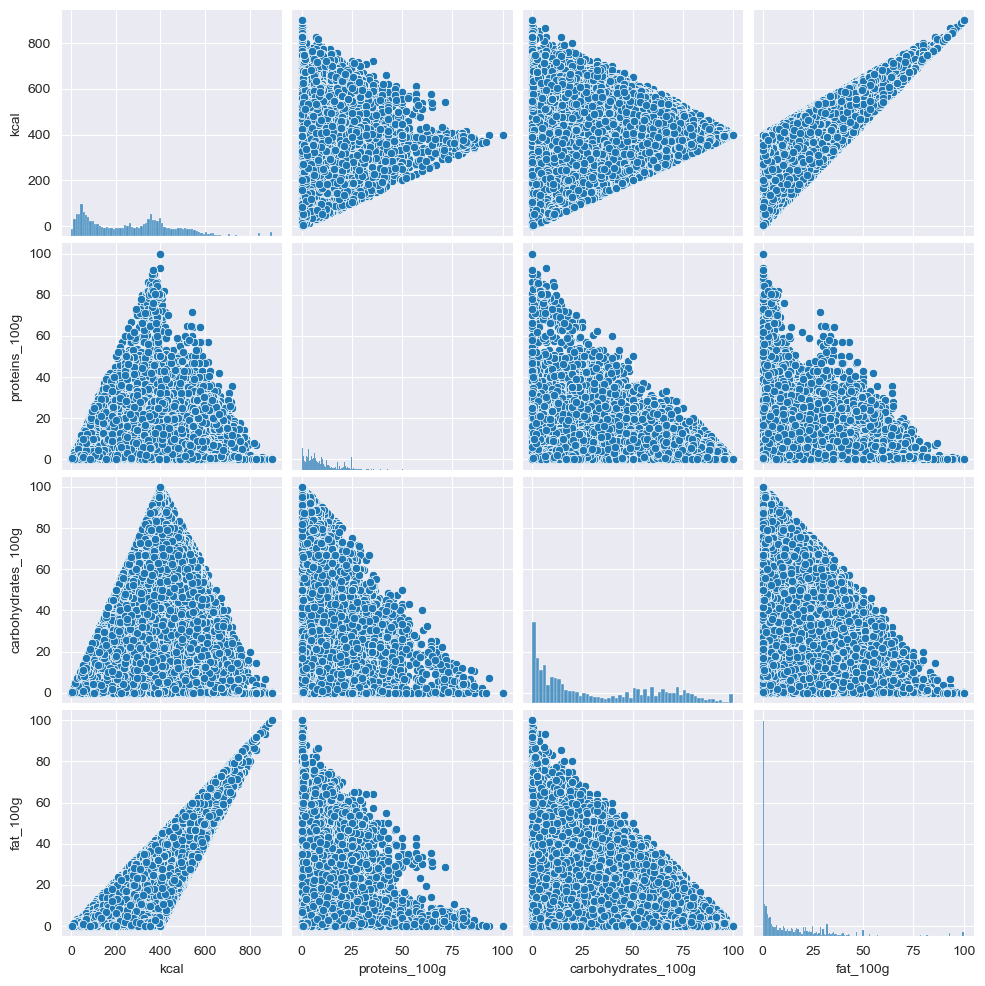

In [13]:
sns.pairplot(data[["kcal","proteins_100g","carbohydrates_100g","fat_100g"]])


Intercept    165.072487
x              8.594244
dtype: float64


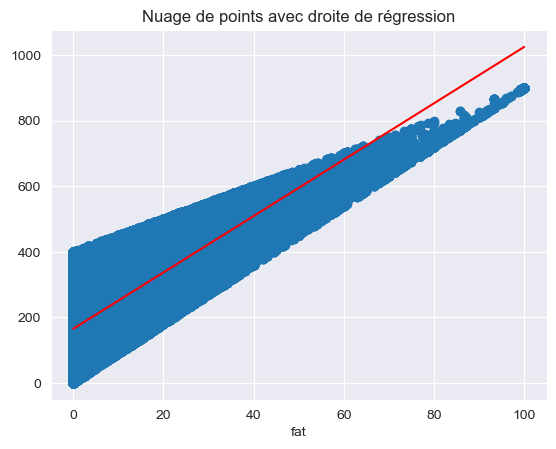

In [21]:
import statsmodels.formula.api as smf

dataf = {'x': data['fat_100g'], 'y': data['kcal']}
df = pd.DataFrame(dataf)

# Régression linéaire
model = smf.ols(formula='y ~ x', data=df)
results = model.fit()

# Coefficients de la droite de régression
a = results.params['x']
b = results.params['Intercept']

# Calcul des valeurs de la droite de régression pour x
x_range = range(int(min(df['x'])), int(max(df['x']))+1)
y_reg = [a*i + b for i in x_range]

# Création du graphique
plt.scatter(df['x'], df['y'])
plt.plot(x_range, y_reg, color='red')

# Ajout d'un titre et d'étiquettes d'axes
plt.title("Nuage de points avec droite de régression")
plt.xlabel("fat")
plt.ylabel("")

# Affichage du graphique
plt.show()
